In [3]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from osgeo import gdal
import xarray as xr
from scipy.io import loadmat
import scipy.stats as stats
%matplotlib inline
plt.rcParams['font.sans-serif'] = 'Arial' # Choose a nice font here
plt.rcParams['font.size'] = 11 # standard font size
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Arial'
plt.rcParams['mathtext.it'] = 'Arial'
plt.rcParams['figure.facecolor'] = 'white' # make sure background isn't transparent
plt.rcParams['figure.dpi'] = 150
# https://www.nature.com/documents/Final_guide_to_authors.pdf

In [4]:
data = pd.read_csv('Marshy Creek Data.csv')
dist = data['Distance from estuary mouth']
depth = data['AVERAGE depth']
orgc = data['Organic C (%)']
tn = data['Total N (%)']
na = data['SODIUM (mg/kg)']
slf = data['SULFUR (mg/kg)']

In [52]:
means = data.groupby(['Site']).mean()
means = means.sort_values(['Distance from estuary mouth'])
dist0 = means['Distance from estuary mouth']
depth0 = means['AVERAGE depth']
orgc0 = means['Organic C (%)']
tn0 = means['Total N (%)']
na0 = means['SODIUM (mg/kg)']
slf0 = means['SULFUR (mg/kg)']
na0log = np.log10(na0)
slf0log = np.log10(slf0)

In [91]:
orgdepth2

LinregressResult(slope=0.11879464343797454, intercept=0.169132717797143, rvalue=0.574162124261221, pvalue=0.0013983820152221724, stderr=0.03322175086314232, intercept_stderr=0.08693328695901671)

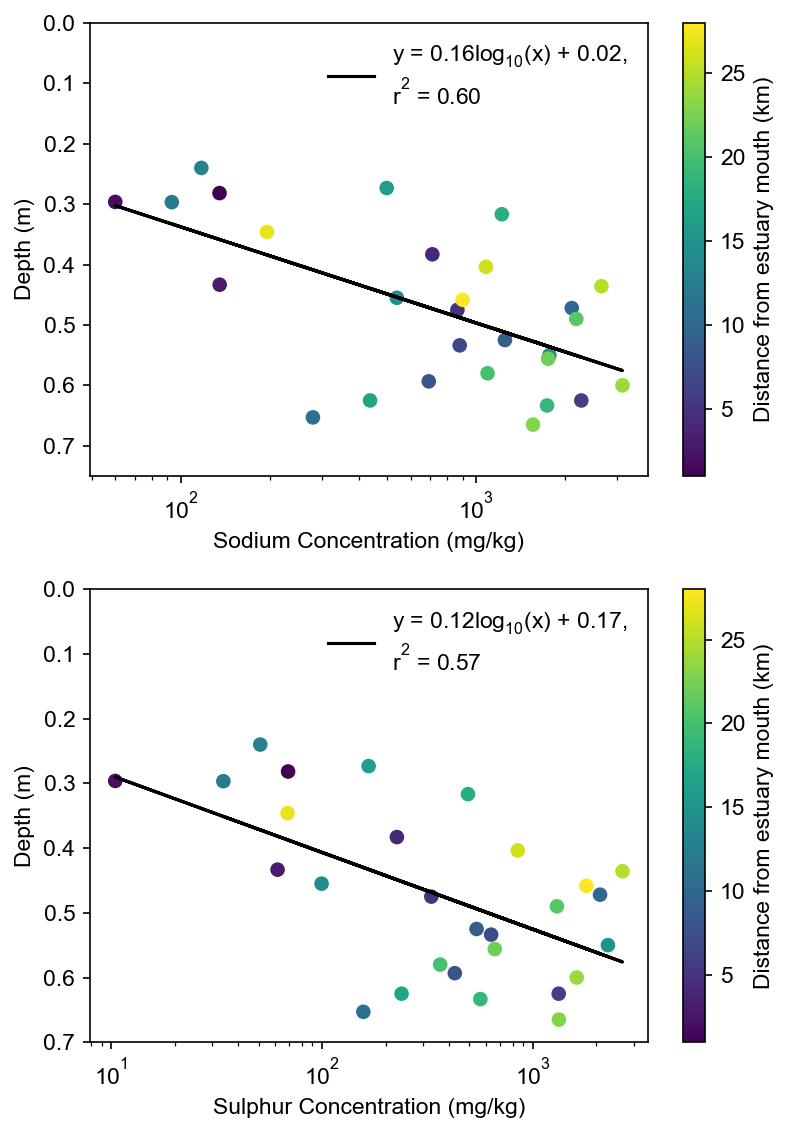

In [86]:
slope, intercept, rvalue, p_value, std_err = stats.linregress(na0log,depth0)
orgdepth1 = stats.linregress(na0log,depth0)

m, c, r_value, p_value, std_err = stats.linregress(slf0log,depth0)
orgdepth2 = stats.linregress(slf0log,depth0)

fig = plt.gcf()

#plot sodium and sulfur in log space

plt.subplot(211)
plt.scatter(na0, depth0, c= dist0)
plt.plot(na0,orgdepth1.slope*na0log+orgdepth1.intercept, c='k', label= 'y = %.2flog$_{10}$(x) + %.2f,\nr$^{2}$ = %.2f'%(slope, intercept, rvalue))
plt.ylim(0.75,0)
plt.xscale('log')
plt.ylabel('Depth (m)')
plt.xlabel('Sodium Concentration (mg/kg)')
plt.colorbar(label='Distance from estuary mouth (km)')
plt.legend(frameon = False)

plt.subplot(212)
plt.scatter(slf0,depth0, c= dist0)
plt.plot(slf0,orgdepth2.slope*slf0log+orgdepth2.intercept, c='k', label= 'y = %.2flog$_{10}$(x) + %.2f,\nr$^{2}$ = %.2f'%(m, c, r_value))
plt.ylim(0.7,0)
plt.xscale('log')
plt.ylabel('Depth (m)')
plt.xlabel('Sulphur Concentration (mg/kg)')
plt.colorbar(label='Distance from estuary mouth (km)')
plt.legend(frameon = False)

plt.subplots_adjust(hspace=0.25,wspace=0.2)
fig.set_size_inches(6,9)
plt.savefig("NaS_figures.png", dpi=300)

In [64]:
upregress = 10**(orgdist.slope*dist0+orgdist.intercept)
upregress2 = 10**(orgdist2.slope*dist0+orgdist2.intercept)

In [93]:
orgdist2

LinregressResult(slope=0.03572926345896582, intercept=2.0254909140616855, rvalue=0.4696143632765169, pvalue=0.011690918481042723, stderr=0.01317326988039925, intercept_stderr=0.21865247160431386)

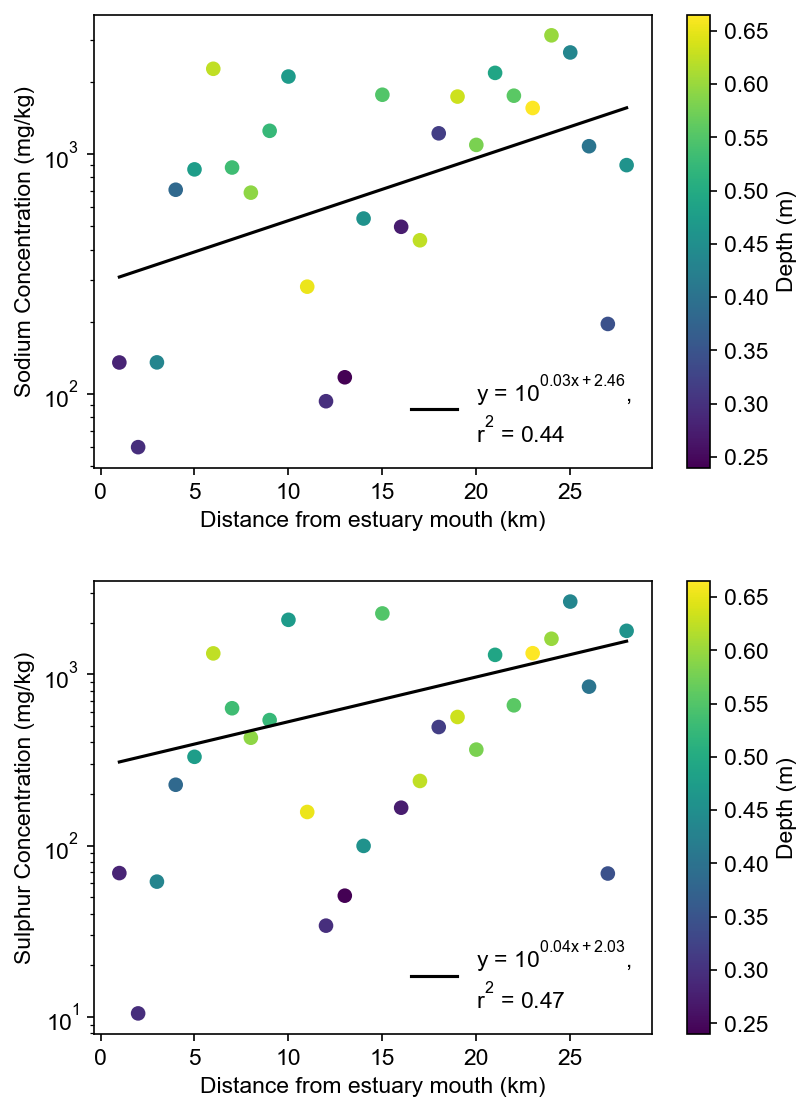

In [88]:
slope2, intercept2, rvalue2, p_value2, std_err = stats.linregress(dist0,na0log)
orgdist = stats.linregress(dist0,na0log)

#plot sodium and sulfur in log space

m0, c0, r_value0, p_value0, std_err = stats.linregress(dist0,slf0log)
orgdist2 = stats.linregress(dist0,slf0log)

fig = plt.gcf()

plt.subplot(211)
plt.scatter(dist0,na0, c= depth0)
plt.plot(dist0,upregress, c='k', label= 'y = 10$^{%.2fx + %.2f}$,\nr$^{2}$ = %.2f'%(slope2, intercept2, rvalue2))
plt.yscale('log')
plt.xlabel('Distance from estuary mouth (km)')
plt.ylabel('Sodium Concentration (mg/kg)')
plt.colorbar(label='Depth (m)')
plt.legend(frameon = False)

plt.subplot(212)
plt.scatter(dist0,slf0, c= depth0)
plt.plot(dist0,upregress, c='k', label= 'y = 10$^{%.2fx + %.2f}$,\nr$^{2}$ = %.2f'%(m0, c0, r_value0))
plt.yscale('log')
plt.xlabel('Distance from estuary mouth (km)')
plt.ylabel('Sulphur Concentration (mg/kg)')
plt.colorbar(label='Depth (m)')
plt.legend(frameon = False)

plt.subplots_adjust(hspace=0.25,wspace=0.3)
fig.set_size_inches(6,9)
plt.savefig("NaS_figure2.png", dpi=300)